Метод лоцмана

In [ ]:
import numpy
import numpy as np
from numpy import sqrt,log

def func(k):
    return 2-sqrt(k**3)-2*log(k)

def prfunc(k):
    return (-3/2)*sqrt(k)-2/k

def dbprfunc(k):
    return (2/k**2)-3/(4*sqrt(k))

e=float(input("Введите точность \n"))
dx=1
k=0
d=0
x=0
while(True):

    x=dx-(2*func(dx)*prfunc(dx))/(2*(prfunc(dx)**2)-func(dx)*dbprfunc(dx))
    k=abs(x-dx)
    print("Это ",d," итерация,")
    print("x ",d,"= ",x)
    print("Разница |x(k)-x(k-1)|= ", k)
    dx=x
    d+=1
    if(k<e):
        break
e=int(abs(np.log10(e)))
x=np.round_(x,e)
print("Ответ x=",x)

Введите точность 
0.001
Это  0  итерация,
x  0 =  1.3010752688172043
Разница |x(k)-x(k-1)|=  0.30107526881720426
Это  1  итерация,
x  1 =  1.2978590422431013
Разница |x(k)-x(k-1)|=  0.0032162265741029206
Это  2  итерация,
x  2 =  1.297859044699658
Разница |x(k)-x(k-1)|=  2.4565567358081353e-09
Ответ x= 1.298


Метод якоби

In [ ]:
from pprint import pprint
import numpy as np
from numpy import array, zeros, diag, diagflat, dot

def jacobi(A,b,e,N=25,x=None):
    if x is None:
        x = zeros(len(A[0]))

    D = diag(A)
    R = A - diagflat(D)
    print("Преобразованная матрица \n",R,"\n")
    k=0
    s=1
    while True:
        dx=x
        x = (b - dot(R,x)) / D
        k=abs(np.max(abs(x))-np.max(abs(dx)))
        print("Это",s,"Итерация x",s,"=",x,"\n")
        if k<e:
            print("Разница норм",k,"\n")
            print("Матрица на прошлой итерации x(k-1)=",dx,"\n")
            print("Конечной итерации xk",x,"\n")
            break
        s+=1
    return x

A = array([[3.738,0.195,0.275,0.136],
 [0.519,5.002,0.405,0.283],
 [0.306,0.381,4.812, 0.418 ],
 [0.272, 0.142, 0.314, 3.935]])
b = array([ 0.815 ,0.191,0.423,0.352 ])
guess = array([1.0,1.0,1.0,1.0])

print ("A:")
pprint(A)

print ("b:")
pprint(b)

e = float(input())
sol = jacobi(A,b,e,N=25,x=guess)
k=np.log10(e)
sol=np.round(sol,abs(int(k)))
print("Ответ: ")
pprint(sol)

A:
array([[3.738, 0.195, 0.275, 0.136],
       [0.519, 5.002, 0.405, 0.283],
       [0.306, 0.381, 4.812, 0.418],
       [0.272, 0.142, 0.314, 3.935]])
b:
array([0.815, 0.191, 0.423, 0.352])
0.0000001
Преобразованная матрица 
 [[0.    0.195 0.275 0.136]
 [0.519 0.    0.405 0.283]
 [0.306 0.381 0.    0.418]
 [0.272 0.142 0.314 0.   ]] 

Это 1 Итерация x 1 = [ 0.05591225 -0.20311875 -0.14172901 -0.09555273] 

Это 2 Итерация x 2 = [0.24253045 0.04926494 0.10873236 0.10422812] 

Это 3 Итерация x 3 = [ 0.20366959 -0.00168062  0.05952793  0.06223485] 

Это 4 Итерация x 4 = [0.21147501 0.00871136 0.06968064 0.07068583] 

Это 5 Итерация x 5 = [0.2098785  0.0066013  0.06762738 0.06896113] 

Это 6 Итерация x 6 = [0.21020238 0.00703078 0.06804579 0.06931148] 

Это 7 Итерация x 7 = [0.21013645 0.00694348 0.06796075 0.0692402 ] 

Это 8 Итерация x 8 = [0.21014985 0.00696124 0.06797805 0.0692547 ] 

Это 9 Итерация x 9 = [0.21014713 0.00695762 0.06797453 0.06925175] 

Это 10 Итерация x 10 = [0.2101476

Градиентый спуск для нулей


In [ ]:
import numpy
import numpy as np
from numpy import sqrt,log, sin,cos,dot
def f1(x,y):
    return -2*(-1.5 + y + cos(x))*sin(x) + 4*(-1 + 2*x + sin(0.5 - y))
def f2(x,y):
    return 2*(-1.5 + y + cos(x) - cos(0.5 - y)*(-1 + 2*x + sin(0.5 - y)))
def fef(x):
    x_1=[f1(x[0],x[1]),f2(x[0],x[1])]
    return x_1

x=[0.5,1]
a=0.131
k=0
e=float(input())
c=0
while(True):
    print("Resh",x)
    dx=x
    x=x-a*np.array(fef(x))
    k=np.max(abs(dx-x))
    print("dx",k," func",fef(x),"\n")
    if(k<e):
        break
    c+=1
print("Итерации=",c,"Ответ \n",x)


0.0000001
Resh [0.5, 1]
dx 0.2986469356812862  func [1.258597327910461, -0.6179545359014454] 

Resh [0.79864694 0.79084067]
dx 0.16487624995627037  func [-0.5933161702369137, 0.5335927125690496] 

Resh [0.63377069 0.87179271]
dx 0.07772441830103571  func [0.4252380337560025, -0.12140280629219155] 

Resh [0.7114951  0.80189207]
dx 0.05570618242203629  func [-0.13817800305712552, 0.22242754660612635] 

Resh [0.65578892 0.81779584]
dx 0.0291380086054025  func [0.1650221693025245, 0.019108794943791446] 

Resh [0.67389024 0.78865783]
dx 0.021617904178630742  func [-0.009046790261323448, 0.11897537600887445] 

Resh [0.65227234 0.78615458]
dx 0.015585774257162566  func [0.08005032816543371, 0.052724128261877654] 

Resh [0.65345747 0.7705688 ]
dx 0.010486592989671806  func [0.024574573730240246, 0.07906210936520647] 

Resh [0.64297087 0.76366194]
dx 0.010357136326842098  func [0.04926921566628169, 0.05514501390955889] 

Resh [0.6397516 0.7533048]
dx 0.0072239968221522455  func [0.0302210792135

Интегрирование


In [ ]:
import math

def function(x):
    return x*math.sin(3*x)
def deffunc(x):
    return 3*x*math.cos(3*x) + math.sin(3*x)
def def2func(x):
    return 6*math.cos(3*x) - 9*x*math.sin(3*x)
def Integfunc(x):
    return 1/9*(-3*x*math.cos(3*x) + math.sin(3*x))

a=0
b=1
e = 0.001
ma = math.fabs(def2func(1))
i = 0
while(i <= 1):
    if(ma < math.fabs(def2func(i))):
        ma = math.fabs(def2func(i))
    i += 0.00005

h = math.sqrt(e * (b-a)/12 * ma)
n = (b-a) / h
print(n)
n = math.ceil(n)
print(n)
n += n % 4
print(n)
h= (b-a)/n

print(h)
Hfun1 = 0
Hfun2 = 0

Hfun3 = 0
Hfun4 = 0

i = a + h
while(i <= b):
    Hfun1 += (function(i - h) + function(i)) / 2 * h
    i += h
i = a + 2*h
while(i <= b):
    Hfun2 += (function(i - 2*h) + function(i)) / 2 * 2 * h
    i += 2*h

i = 0
while(a + i*h <= b):
    if(i == 0 or i == n):
        Hfun3 += function(a + i*h) /2
    elif(i % 2 == 1):
        Hfun3 += function(a+i*h) * 2
    else:
        Hfun3 += function(a + i * h)
    i += 1
Hfun3 *= 2*h/3

i = 0
while(a + i*2*h <= b):
    if(i == 0 or i == n/2):
        Hfun4 += function(a + i*2*h) /2
    elif(i % 2 == 1):
        Hfun4 += function(a+i*2*h) * 2
    else:
        Hfun4 += function(a + i * 2*h)
    i += 1
Hfun4 *= 2*2*h/3
print("Трапеция")
print("h",Hfun1,"2h",Hfun2)
print("Симпсона")
print("h",Hfun3,"2h",Hfun4)
print("Интеграл")
print(Integfunc(b) - Integfunc(a))
print("Сравнение")
print(math.fabs(Hfun1 - Hfun2) / 3)
print(math.fabs(Hfun3 - Hfun4) / 15)

35.903344392324954
36
36
0.027777777777777776
Трапеция
h 0.3405239337287005 2h 0.3330700291586901
Симпсона
h 0.34567757562763307 2h 0.34567871629025315
Интеграл
0.34567749976235596
Сравнение
0.002484634856670128
7.604417467203342e-08


Золотое сечение,метод секущих,метод ньютона для функции неск переменных

In [ ]:
import numpy as np
from numpy import sqrt, log,cos,sin
def f1(x):
    return (0.1*x-5)**8+cos(0.02*x)
def df1(x):
    return 4*((x/10 - 5)**7)/5 -sin(x/50)/50
def f2(x):
    return -sqrt(20*x-x**2)+0.01*sin(x)
def df2(x):
    return (-10 + x)/sqrt(-(-20 + x)*x) + 0.01*cos(x)
def f3(x):
    return log(x)+0.1*sin(0.1*x)
def df3(x):
    return 1/x + 0.01*cos(0.1*x)
def f4(x):
    return cos(x)/x**2
def df4(x):
    return -(2*cos(x) + x*sin(x))/x**3

def Golden(func,a,b,e):
    k = 1
    p=0
    while k>e:
        k=((sqrt(5)-1) / 2) * (b - a)
        x1=a+((3-sqrt(5))/2)*(b-a)
        x2 = a + ((sqrt(5)-1) / 2) * (b - a)
        if func(x1)<func(x2):
            b=x2
            p=0
        if func(x1)>func(x2):
            a=x1
            p=1
        print("x1 ",x1,"x2 ",x2,"fx1",func(x1),"fx2",func(x2),"en ",k)
    if not(p)==0:
        print("Ответ x=",x2,"func",func(x2),"\n")
    if not(p)==1:
        print("Ответ x=",x1 ,"func", func(x1),"\n")


print("№1\n")
print("№1.1\n")
Golden(f1,49,51,0.02)
print("№1.2\n")
Golden(f2,9,11,0.05)
print("№1.3\n")
Golden(f3,10,12,0.01)
print("№1.4\n")
Golden(f4,7,11,0.01)

def Secu(dfunc,a,b,e):
    while True:
        x=a-((dfunc(a))/((dfunc(a)-dfunc(b))))*(a-b)
        print(a,b,dfunc(x),x)
        if abs(dfunc(x))<e:
           break
        print(dfunc(x))
        if (dfunc(x))>0:
            b=x
        else:
            a=x
    return x

print("№2\n")
print("№2.1\n")
print("Ответ x=",Secu(df1,49,51,0.02),"func",f1(Secu(df1,49,51,0.02)),"\n")
print("№2.2\n")
print("Ответ x=",Secu(df2,9,11,0.05),"func",f2(Secu(df2,9,11,0.05)),"\n")
print("№2.3\n")
print("Ответ x=",Secu(df3,10,12,0.01),"func",f3(Secu(df3,10,12,0.01)),"\n")
print("№2.4\n")
print("Ответ x=",Secu(df4,7,11,0.01),"func",f4(Secu(df4,7,11,0.01)),"\n")

print("№3\n")

def Jacobs1(X):
    return [4*(-1 + X[0])**3,2*X[1]-6]
def Hesse1(X):
    return [[(12*(X[0]-1)**2),0],[0,2]]

def Jacobs2(X):
    return [-1 - 2*X[0] + X[1],X[0]-2*X[1],2-2*X[2]]
def Hesse2(X):
    return [[-2,1,0],[1,-2,0],[0,0,-2]]

def Newton(x,JACOBS,HESSE,eps):
    while True:
        d=0
        print(x)
        x=x-np.dot(np.linalg.inv(HESSE(x)),JACOBS(x))
        a=len(JACOBS(x))
        k=np.absolute(JACOBS(x))
        for i in range(a):
            if k[i]<eps:
                d+=1
        if d==a:
            break
    print(x)
print("№3.1\n")
Newton([1000,1000],Jacobs1,Hesse1,0.000001)
print("№3.2\n")
Newton([500,-150,1],Jacobs2,Hesse2,0.000001)

№1

№1.1

x1  49.763932022500214 x2  50.236067977499786 fx1 0.5442691561864065 fx2 0.5363234115662272 en  1.2360679774997898
x1  50.23606797749979 x2  50.52786404500042 fx1 0.536323411566227 fx2 0.5313887156586753 en  0.7639320225002082
x1  50.52786404500042 x2  50.70820393249937 fx1 0.5313887156586753 fx2 0.528329846687123 en  0.47213595499957717
x1  50.708203932499366 x2  50.819660112501055 fx1 0.5283298466871232 fx2 0.5264359236942094 en  0.2917960675006311
x1  50.81966011250105 x2  50.88854381999832 fx1 0.5264359236942094 fx2 0.5252641073653688 en  0.1803398874989505
x1  50.88854381999832 x2  50.93111629250273 fx1 0.5252641073653688 fx2 0.5245393870543168 en  0.11145618000168497
x1  50.931116292502736 x2  50.95742752749558 fx1 0.5245393870543168 fx2 0.5240912954200907 en  0.06888370749726552
x1  50.95742752749558 x2  50.973688765007154 fx1 0.5240912954200907 fx2 0.5238142871348509 en  0.04257247250441506
x1  50.97368876500715 x2  50.983738762488436 fx1 0.5238142871348509 fx2 0.5236

Сравнение метода рунге-кутты и эйлера

0.049999999999999996
0.3237549103251909 0.2959058972273476
2.4645052143501545e-06 0.0139527273670208
[1.0, 1.0008361131097543, 1.0025181171458803, 1.0050622722458393, 1.0084916542141815, 1.012836661336793, 1.018135720684717, 1.024436231336477, 1.0317957967269487, 1.0402838180925433, 1.0499835480825195, 1.0609947415800782, 1.0734370950523555, 1.087454744843277, 1.1032222124080606, 1.1209523630346352, 1.1409072220187737, 1.1634129343862543, 1.1888808791079553, 1.2178381756801027, 1.2509729746100424, 1.2892038653392073, 1.3337903108822102] 
 [1.0004169274162251, 1.001670846724458, 1.0037712420019498, 1.006734166512937, 1.010582624825265, 1.0153471336359534, 1.0210664897252224, 1.0277887855936498, 1.0355727291884573, 1.044489345461382, 1.054624166928355, 1.0660800618569488, 1.0789809082732364, 1.0934764092617792, 1.1097484755567155, 1.1280198009064184, 1.1485655679036135, 1.1717297236388513, 1.1979480947609977, 1.227782032188564, 1.2619688015034103, 1.3014996290493814, 1.3477455027544454] 

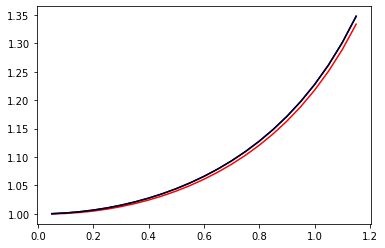

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def FUNC(X,Y):
    return ((-2/3)*Y**4)*np.sin(X)+Y*np.tan(X)
def Realfunc(X):
    return 1/(np.cos(X)**(1/3))


def Found(a,b,X,Y,eps,func):
    h=eps**(1/4)
    k = Runge(X+2*h, Y, h, func) -Runge(X+2*h, Y ,  2*h, func)
    if(abs(k/15)>eps):
        while True:
            k = (abs(Runge(X + 2 * h, Y, h, func) - Runge(X + 2 * h, Y, 2 * h, func)))
            if(abs(abs(k/15)-eps)<=eps*5) :
                break
            h = h / 2
    else:
        while True:
            print(h)
            k = (abs(Runge(X + 2 * h, Y + 2 * h, h, func) - Runge(X + 2 * h, Y + 2 * h, 2 * h, func)))
            if(abs(abs(k/15)-eps)>=eps):
                break
            h=h*2
    c=int(((b-a)/h))
    c+=c%2
    h=(b-a)/(c)
    print(h)
    return h



def Runge(x,y,H,Аunc):
    F1=Аunc(x,y)
    F2=Аunc(x+H/2,y+(H/2)*F1)
    F3=Аunc(x+H/2,y+(H/2)*F2)
    F4 = Аunc(x+H, y+H*F3)
    return y+(H/6)*(F1+2*F2+2*F3+F4)

def Eiler(X,Y,H,func):
    return Y+H*func(X,Y)

def PMethods(X,Y,H,Method,Func):
    YY=[]
    G=0
    for j in range(len(X)):
        YY.append(Method(G, Y, H, Func))
        Y=Method(G,Y,H,Func)
        G+=H
    return YY


h=Found(0,1.2,0,1,0.0001,FUNC)
i=h
xx=[]
xx2h=[]
yyR=[]
yyT=[]
yyE=[]
while i<1.2:
    xx.append(i)
    yyT.append(1 / (np.cos(i) ** (1 / 3)))
    i+=h
i=h
while i<1.2:
    xx2h.append(i)
    i+=2*h

yyE=PMethods(xx,1,h,Eiler,FUNC)
yyR=PMethods(xx,1,h,Runge,FUNC)
yyE2=PMethods(xx2h,1,2*h,Eiler,FUNC)
yyR2=PMethods(xx2h,1,2*h,Runge,FUNC)
dE=[]
dR=[]
for p in range(len(xx2h)):
    dR.append(np.abs(yyR[p+1] - yyR2[p]))
    dE.append(np.abs(yyE[p+1] - yyE2[p]))

dEt=max([np.abs((yyT[p]) - yyE[p]) for p in range(len(xx))])
dRt=max([np.abs((yyT[p]) - yyR[p]) for p in range(len(xx))])
print(np.max(dR),np.max(dE))
print(dRt,dEt)
print(yyE,"\n",yyR,"\n",yyT)
plt.plot(xx,yyE,color="red")
plt.plot(xx,yyR,color="blue")
plt.plot(xx,yyT,color="black")
plt.show()

Метод Адамса и РУнге кутты

Шаг= 0.0011111111111111111
+-----------------------+------------------------+------------------------+------------------------+
|           x           |         Адамс          |        Адамс 2H        |           Dy           |
+-----------------------+------------------------+------------------------+------------------------+
| 0.0011111111111111111 | 4.538355859150796e-07  |                        |                        |
| 0.0022222222222222222 |  1.8139949746389e-06   | 1.8139949750135961e-06 | 2.497974982696606e-17  |
|  0.003333333333333333 | 4.078454621819749e-06  |                        |                        |
| 0.0044444444444444444 | 7.094724169463301e-06  | 7.245187691433338e-06  | 1.0030901464669145e-08 |
|  0.005555555555555556 | 1.1199337546490537e-05 |                        |                        |
|  0.006666666666666667 | 1.616452394662532e-05  | 1.6277350500691832e-05 | 7.521770271100798e-09  |
|  0.007777777777777778 | 2.202588386378129e-05  |              

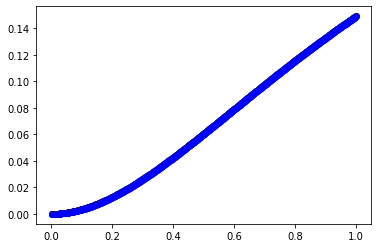

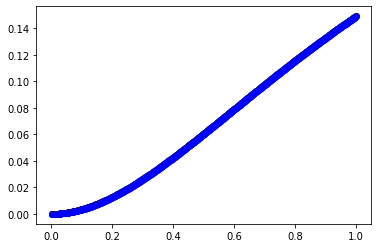

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
def FUNC(X,Y):
    return (2*X*np.exp(X*Y))/((1+X**2)*np.exp(1+X))

def Found(a,b,X,Y,eps,func):
    h=eps**(1/4)
    k = Runge(X+2*h, Y, h, func) -Runge(X+2*h, Y ,  2*h, func)
    if(abs(k/15)>eps):
        while True:
            k = (abs(Runge(X + 2 * h, Y, h, func) - Runge(X + 2 * h, Y, 2 * h, func)))
            if(abs(abs(k/15)-eps)<=eps*5) :
                break
            h = h / 2
    else:
        while True:
            k = (abs(Runge(X + 2 * h, Y + 2 * h, h, func) - Runge(X + 2 * h, Y + 2 * h, 2 * h, func)))
            if(abs(abs(k/15)-eps)>=eps):
                break
            h=h*2
    c=int((b-a)/h)
    c+=c%2
    h=(b-a)/(c)
    print("Шаг=",h)
    return h

def Runge(x, y, H, Func, ):
    F1=Func(x,y)
    F2=Func(x+H/2,y+(H/2)*F1)
    F3=Func(x+H/2,y+(H/2)*F2)
    F4 = Func(x+H, y+H*F3)
    return y+(H/6)*(F1+2*F2+2*F3+F4)

def Adams(X,Y,H,Func,xx):
    y=[]
    G=X
    y = np.zeros(len(xx)+1)
    for j in range(3):
        y[j]=Runge(G, Y, H, Func)
        Y=Runge(G,Y,H,Func)
        G+=H
    K0=Func(xx[2],y[2])
    K1=Func(xx[1],y[1])
    K2=Func(xx[0],y[0])
    for i in range(2,len(xx)-1):
        K3=K2
        K2=K1
        K1=K0
        K0=Func(xx[i],y[i])
        y[i+1] = y[i] + H * (55 * K0 - 59 * K1 + 37 * K2 -12*K3) / 24
        K0_T= Func(xx[i + 1], y[i + 1])
        y[i + 1] = y[i] + H * (9 * K0_T + 19 * K0 - 5 * K1 + K2) / 24
    y = y[:-1]
    return y


def PMethods(X,Y,H,Method,Func):
    YY=[]
    G=0
    for j in range(len(X)):
        YY.append(Method(G, Y, H, Func))
        Y=Method(G,Y,H,Func)
        G+=H
    return YY
a=0
b=1
e=float(input("Введите точность \n"))
while True:
    if e<0.01:
        break
    else:
        print("Задача не может быть решена")
        e = float(input("Введите точность \n"))
h=Found(a,b,0,0,e,FUNC)
xxp=[]
i=h
while i<b:
    xxp.append(i)
    i+=h
xx2p=[]
i=h
while i<b:
    xx2p.append(i)
    i+=2*h

yyA=Adams(0,0,h,FUNC,xxp)
yyR=PMethods(xxp,0,h,Runge,FUNC)
yy2A=Adams(0,0,2*h,FUNC,xx2p)
yy2R=PMethods(xx2p,0,2*h,Runge,FUNC)
Rungus = PrettyTable(['x', 'Рунге-Кутты', 'РУнге 2H','Dy'])
p=0
dR=[]
for i in range(len(xxp)):
    if i%2==0:
        Rungus.add_row([xxp[i], yyR[i], " ", " "])
    else:
        Rungus.add_row([xxp[i], yyR[i], yy2R[p], abs(yyR[i] - yy2R[p])/15])
        dR.append(abs(yyR[i] - yy2R[p])/15)
        p+=1
print(Rungus,"\n",'dy=max|yR-y2R|=',max(dR))


dA=[]
Amogus = PrettyTable(['x', 'Адамс', 'Адамс 2H','Dy'])
p=0
for i in range(len(xxp)):
    if i%2==0:
        Amogus.add_row([xxp[i], yyA[i]," ", " "])
    else:
        Amogus.add_row([xxp[i], yyA[i], yy2A[p], abs(yyA[i] - yy2A[p])/15])
        dA.append(abs(yyA[i] - yy2A[p])/15)
        p+=1
print(Amogus,"\n",'dy=max|yA-y2A|=',max(dA))

dRA=[]
output = PrettyTable(['x', 'Рунге-Кутты', 'Адамса',"dy"])
for i in range(len(xxp)):
    output.add_row([xxp[i],yyR[i],yyA[i],abs(yyR[i]-yyA[i])])
    dRA.append(abs(yyR[i]-yyA[i]))
print(output,"\n",'dy=max|yr-yA|=',max(dRA))
plt.scatter(xxp,yyR,color ="Red",label="Runge")
plt.plot(xxp,yyR,color ="Red",label="Runge")
plt.show()
plt.scatter(xxp,yyA,color ="blue",label="Adams")
plt.plot(xxp,yyA,color ="blue",label="Adams")
plt.show()
plt.scatter(xxp,yyR,color ="Red",label="Runge")
plt.plot(xxp,yyR,color ="Red",label="Runge")
plt.scatter(xxp,yyA,color ="blue",label="Adams")
plt.plot(xxp,yyA,color ="blue",label="Adams")
plt.show()